# Voice Recognition

### Transform audio files into spectrogram images

In [1]:
from pathlib import Path

from utils.audios import plot_spectrogram
from utils.files import increment_path

ROOT = Path("../data/")
DATASET_PATH = increment_path(ROOT / "SpectrogramImages")
DATA_PATH = ROOT / "audio"

In [ ]:
for directory in DATA_PATH.iterdir():
    if not directory.is_dir():
        continue
    for file in directory.iterdir():
        if not file.is_file():
            continue
        if not (DATASET_PATH / directory.name).exists():
            (DATASET_PATH / directory.name).mkdir()
        plot_spectrogram(file, str(DATASET_PATH / directory.name / f"{file.stem}.png"))

### Load images (without channel-flatten)

== Loading Image
LocalBinaryPatternsImageDataset(size=520, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


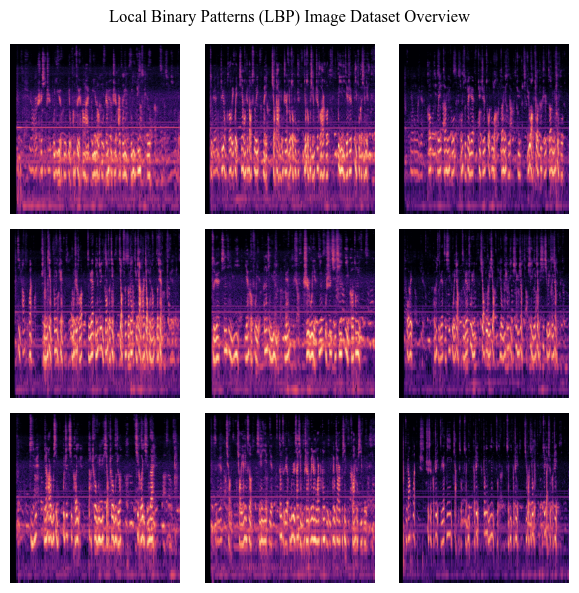

In [3]:
%matplotlib inline
from datasets.lbp import LocalBinaryPatternsImageDataset

DATASET_PATH = ROOT / "SpectrogramImages"
dataset_spectrogram_aug = LocalBinaryPatternsImageDataset()
dataset_spectrogram_aug.load_images(str(DATASET_PATH))
print(dataset_spectrogram_aug)
dataset_spectrogram_aug.overview()

In [4]:
dataset_spectrogram_aug.export_csv(ROOT / "csv", train_test_split=True, train_ratio=0.5)

In [ ]:
dataset_spectrogram_aug.save_lbp_images(ROOT / "lbp")

In [4]:
from datasets.lbp import LocalBinaryPatternsDataset

train_dataset, test_dataset = LocalBinaryPatternsDataset(), LocalBinaryPatternsDataset()
train_dataset.load_csv(ROOT / "csv" / "train.csv")
test_dataset.load_csv(ROOT / "csv" / "test.csv")
print(train_dataset)
print(test_dataset)

In [5]:
from models.lbp import LocalBinaryPatternsClassifierBackend
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier = LocalBinaryPatternsClassifierBackend(
    estimators=[
        SVC(kernel='linear', C=1.0, random_state=42, probability=True),
        RandomForestClassifier(n_estimators=1000, random_state=42)
    ],
    # scaler=StandardScaler()
)

classifier.train(train_dataset)
classifier.evaluate(test_dataset)

Method: KNN
Distance Function: euclidean
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  1  0  1  6  0  0  1  0  0  1]
 [ 0  0 15  0  0  0  0  0  0  2  0  0  0]
 [ 0  5  0 11  0  0  2  0  3  0  1  0  0]
 [ 0  0  0  0 16  0  0  1  1  0  0  1  0]
 [ 0  0  0  0  0 12  0  0  0  0 11  0  0]
 [ 0  5  1  4  0  0  7  1  0  3  0  0  0]
 [ 0  0  0  0  0  0  0 17  6  1  0  0  0]
 [ 0  0  0  0  0  0  1  4 16  0  0  0  0]
 [ 0  0  1  0  0  0  2  2  3 14  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  1  0  0  0  0  0  0  0  0  1  0 16]]
Accuracy: 0.7153846153846154
Precision: 0.739456837973943
Recall: 0.7282180118530908
F1 Score: 0.7227908120859676


Method: KNN
Distance Function: manhattan
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  2  0  0  6  0  0  1  2  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0 10  0  0  2  0  2  1  2  0  1]
 [ 0  0  0  0 17  0  0  1  1  0  0  0  0]
 [ 0  0  

== Loading Image
LocalBinaryPatternsImageDataset(size=520, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


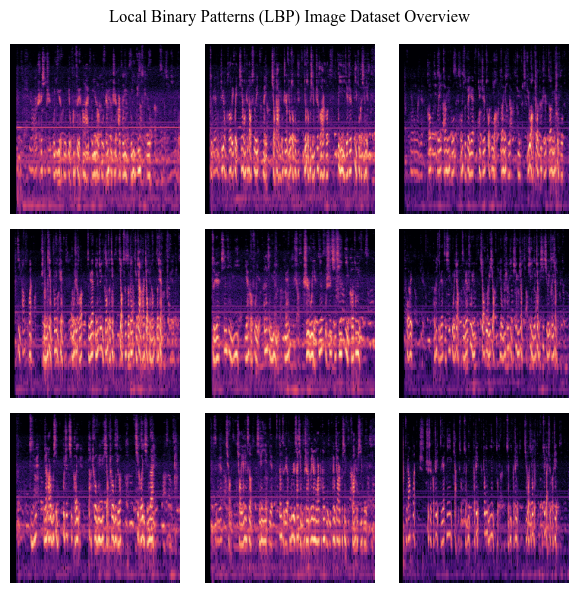

In [17]:
from datasets.lbp import LocalBinaryPatternsImageDataset

DATASET_PATH = ROOT / "SpectrogramImages"
dataset_spectrogram_cf = LocalBinaryPatternsImageDataset()
dataset_spectrogram_cf.load_images(str(DATASET_PATH), channel_flatten=True)
print(dataset_spectrogram_cf)
dataset_spectrogram_cf.overview()

In [7]:
dataset_spectrogram_cf.export_csv(ROOT / "csv-channel-flatten", train_test_split=True, train_ratio=0.5)

In [8]:
from datasets.lbp import LocalBinaryPatternsDataset

train_dataset, test_dataset = LocalBinaryPatternsDataset(), LocalBinaryPatternsDataset()
train_dataset.load_csv(ROOT / "csv-channel-flatten" / "train.csv")
test_dataset.load_csv(ROOT / "csv-channel-flatten" / "test.csv")
print(train_dataset)
print(test_dataset)

In [9]:
from models.lbp import LocalBinaryPatternsClassifierBackend
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier = LocalBinaryPatternsClassifierBackend(
    estimators=[
        SVC(kernel='linear', C=1.0, random_state=42, probability=True),
        RandomForestClassifier(n_estimators=1000, random_state=42)
    ],
    # scaler=StandardScaler()
)

classifier.train(train_dataset)
classifier.evaluate(test_dataset)

Method: KNN
Distance Function: euclidean
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  2  0  0  5  0  0  2  1  0  0]
 [ 0  0 15  0  0  0  1  0  0  1  0  0  0]
 [ 0  5  0 13  0  0  1  0  3  0  0  0  0]
 [ 0  0  0  0 16  0  0  1  1  0  0  1  0]
 [ 0  0  0  0  0 13  0  0  0  0  9  0  1]
 [ 0  5  1  4  0  0  7  1  0  3  0  0  0]
 [ 0  0  0  0  0  0  0 18  5  1  0  0  0]
 [ 0  0  0  0  0  0  1  4 16  0  0  0  0]
 [ 0  0  1  0  0  0  2  3  2 14  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  1  0  0  0  1  0  0  0  0  1  0 15]]
Accuracy: 0.7269230769230769
Precision: 0.7463017605451613
Recall: 0.7374871243830726
F1 Score: 0.7333616119485685


Method: KNN
Distance Function: manhattan
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  3  0  0  6  0  0  1  2  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0 12  0  0  2  0  3  0  0  0  1]
 [ 0  0  0  0 16  0  0  1  1  0  0  1  0]
 [ 0  0 

In [2]:
%matplotlib inline
from datasets.base import BaseImageDataset

DATASET_PATH = ROOT / "SpectrogramImages"
dataset_spectrogram_aug = BaseImageDataset()
dataset_spectrogram_aug.load_images(str(DATASET_PATH))
print(dataset_spectrogram_aug)


BaseImageDataset(size=520, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


In [3]:
from datasets.aug import AugmentationDataset

aug_dataset = AugmentationDataset()
aug_dataset.from_base_dataset(dataset_spectrogram_aug)
print(aug_dataset)

AugmentationDataset(size=520, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


In [4]:
aug_dataset.apply_augmentation(aug_ratio=0.5, gaussian_noise=True, mix_patch=True)


In [5]:
print(aug_dataset)

AugmentationDataset(size=780, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


In [7]:
aug_dataset.save_images(ROOT / "augmented")

-- Saving image 1/780
-- Saving image 2/780
-- Saving image 3/780
-- Saving image 4/780
-- Saving image 5/780
-- Saving image 6/780
-- Saving image 7/780
-- Saving image 8/780
-- Saving image 9/780
-- Saving image 10/780
-- Saving image 11/780
-- Saving image 12/780
-- Saving image 13/780
-- Saving image 14/780
-- Saving image 15/780
-- Saving image 16/780
-- Saving image 17/780
-- Saving image 18/780
-- Saving image 19/780
-- Saving image 20/780
-- Saving image 21/780
-- Saving image 22/780
-- Saving image 23/780
-- Saving image 24/780
-- Saving image 25/780
-- Saving image 26/780
-- Saving image 27/780
-- Saving image 28/780
-- Saving image 29/780
-- Saving image 30/780
-- Saving image 31/780
-- Saving image 32/780
-- Saving image 33/780
-- Saving image 34/780
-- Saving image 35/780
-- Saving image 36/780
-- Saving image 37/780
-- Saving image 38/780
-- Saving image 39/780
-- Saving image 40/780
-- Saving image 41/780
-- Saving image 42/780
-- Saving image 43/780
-- Saving image 44/7

== Loading Image
LocalBinaryPatternsImageDataset(size=780, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


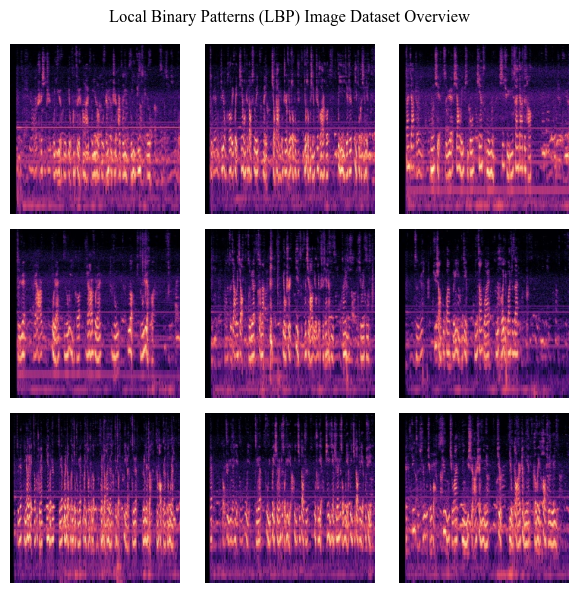

In [8]:
%matplotlib inline
from datasets.lbp import LocalBinaryPatternsImageDataset

DATASET_PATH = ROOT / "augmented"
dataset_spectrogram_aug = LocalBinaryPatternsImageDataset()
dataset_spectrogram_aug.load_images(str(DATASET_PATH))
print(dataset_spectrogram_aug)
dataset_spectrogram_aug.overview()

In [9]:
dataset_spectrogram_aug.export_csv(ROOT / "csv-augmented", train_test_split=True, train_ratio=0.5)

In [10]:
from datasets.lbp import LocalBinaryPatternsDataset

train_dataset, test_dataset = LocalBinaryPatternsDataset(), LocalBinaryPatternsDataset()
train_dataset.load_csv(ROOT / "csv-augmented" / "train.csv")
test_dataset.load_csv(ROOT / "csv-augmented" / "test.csv")
print(train_dataset)
print(test_dataset)

### Augmented Evaluation

In [11]:
from models.lbp import LocalBinaryPatternsClassifierBackend
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier = LocalBinaryPatternsClassifierBackend(
    estimators=[
        SVC(kernel='linear', C=1.0, random_state=42, probability=True),
        RandomForestClassifier(n_estimators=1000, random_state=42)
    ],
    # scaler=StandardScaler()
)

classifier.train(train_dataset)
classifier.evaluate(test_dataset)

Method: KNN
Distance Function: euclidean
Confusion Matrix: [[32  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 14  0  0  0  5  7  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  1  0  0  0]
 [ 0  2  0 23  0  1  0  0  0  0  0  0  1]
 [ 0  0  1  0 25  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0 20  0  0  0  0  3  0  0]
 [ 0  3  0  0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 25  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  3 23  0  0  0  0]
 [ 0  1  4  4  2  0  2  3  1 18  0  0  0]
 [ 0  1  0  0  0  3  1  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 33  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0 31]]
Accuracy: 0.8461538461538461
Precision: 0.843841332171862
Recall: 0.843357222640771
F1 Score: 0.8375285168314741


Method: KNN
Distance Function: manhattan
Confusion Matrix: [[31  0  0  1  0  0  0  2  0  0  0  0  0]
 [ 0 20  0  0  0  3  4  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  1  0  0  0]
 [ 0  2  0 23  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  0 26  0  0  0  0  0  0  3  0]
 [ 0  0  0

### Augment (with channel-flatten)

== Loading Image
LocalBinaryPatternsImageDataset(size=780, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


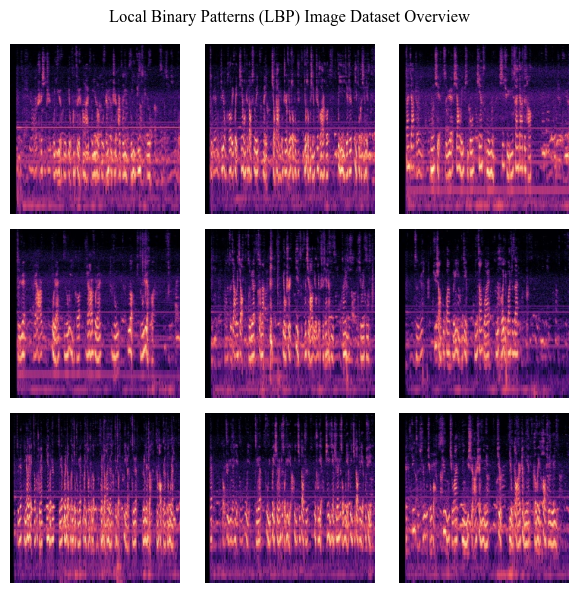

In [12]:
%matplotlib inline
from datasets.lbp import LocalBinaryPatternsImageDataset

DATASET_PATH = ROOT / "augmented"
dataset_spectrogram_aug = LocalBinaryPatternsImageDataset()
dataset_spectrogram_aug.load_images(str(DATASET_PATH), channel_flatten=True)
print(dataset_spectrogram_aug)
dataset_spectrogram_aug.overview()

In [13]:
dataset_spectrogram_aug.export_csv(ROOT / "csv-augmented-channel-flatten", train_test_split=True, train_ratio=0.5)

In [14]:
from datasets.lbp import LocalBinaryPatternsDataset

train_dataset, test_dataset = LocalBinaryPatternsDataset(), LocalBinaryPatternsDataset()
train_dataset.load_csv(ROOT / "csv-augmented-channel-flatten" / "train.csv")
test_dataset.load_csv(ROOT / "csv-augmented-channel-flatten" / "test.csv")
print(train_dataset)
print(test_dataset)

### Augmented Evaluation (with channel-flatten)

In [15]:
from models.lbp import LocalBinaryPatternsClassifierBackend
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier = LocalBinaryPatternsClassifierBackend(
    estimators=[
        SVC(kernel='linear', C=1.0, random_state=42, probability=True),
        RandomForestClassifier(n_estimators=1000, random_state=42)
    ],
    # scaler=StandardScaler()
)

classifier.train(train_dataset)
classifier.evaluate(test_dataset)

Method: KNN
Distance Function: euclidean
Confusion Matrix: [[32  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 0 18  0  0  0  2  5  0  1  0  0  0  2]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  1  3  0  0  2]
 [ 1  0  0  0 24  0  2  0  1  2  0  2  0]
 [ 0  1  0  0  0 26  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0 21  2  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11 20  0  0  0  0]
 [ 0  0  3  0  0  0  0  3  1 25  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32]]
Accuracy: 0.8589743589743589
Precision: 0.863087756837757
Recall: 0.8583040798141853
F1 Score: 0.8526011559426185


Method: KNN
Distance Function: manhattan
Confusion Matrix: [[32  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0 19  0  0  0  2  4  0  1  0  0  0  2]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  1  2  0  0  2]
 [ 0  0  0  0 25  0  0  1  1  3  0  2  0]
 [ 0  1  